In [1]:
import sys
sys.path.append("/mnt/d/DKE/MRP1_SizeMatters/Size-Matters/framework")
sys.path.append("/mnt/d/DKE/MRP1_SizeMatters/Size-Matters/application")


import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
from captum.attr import LayerConductance

import train_utils
from NetworkClass import Network

## Create Model from Network Class and Define Dataloaders for MNIST from torchvision
Batch size test can be varied to generate conductance values over a larger set of inputs. Train batch can also be changed for faster learning within an epoch

In [22]:

batch_size_train = 64
batch_size_test = 1000
n_epochs = 10
learning_rate = 0.01
momentum = 0.5
log_interval = 10
random_seed = 1

    
model_dict = {
        "network":{
            'input_layer': {
                "units": 784,
                
                },
            'hidden_layer': [{
                    "units": 500, 
                    "activation": "relu",
                    "type": "Linear"
                }, 
                {
                    "units": 300, 
                    "activation": "relu",
                    "type": "Linear"

                }],
            'output_layer': {
                "units": 10,
                "activation": "softmax",
                "type": "Linear"
                }
        }
    }

model = Network(model_dict)


train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,)), train_utils.ReshapeTransform((-1,))
                             ])),
  batch_size=batch_size_train, shuffle=True)


test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,)), train_utils.ReshapeTransform((-1,))
                             ])),
  batch_size=batch_size_test, shuffle=True)




softmax


In [23]:
for p in model.named_parameters():
    print(p[1]) 

Parameter containing:
tensor([[-0.0186,  0.0290, -0.0332,  ...,  0.0328, -0.0356,  0.0355],
        [-0.0061, -0.0219,  0.0274,  ...,  0.0039,  0.0194,  0.0053],
        [ 0.0270,  0.0123,  0.0148,  ..., -0.0249, -0.0182, -0.0018],
        ...,
        [-0.0028, -0.0174, -0.0341,  ...,  0.0197,  0.0055,  0.0215],
        [ 0.0111, -0.0177,  0.0152,  ..., -0.0075,  0.0078,  0.0285],
        [ 0.0185, -0.0341,  0.0150,  ...,  0.0096, -0.0185,  0.0289]],
       requires_grad=True)
Parameter containing:
tensor([ 3.0783e-02, -1.8658e-02,  3.4878e-03, -1.2988e-02, -3.3305e-02,
        -1.4899e-02, -2.3604e-02, -6.0555e-03,  2.1412e-02,  1.4235e-03,
        -1.6945e-02, -3.4793e-02,  3.2999e-02,  4.2396e-03, -9.0187e-03,
        -6.9939e-03, -3.0228e-02,  7.8130e-03,  4.8421e-04, -3.0152e-03,
        -3.1360e-02,  1.7814e-04,  4.9348e-03,  3.2803e-02,  1.1678e-02,
        -2.9558e-02,  3.2571e-02,  2.9897e-02,  2.7514e-02,  9.5702e-03,
        -2.6003e-02, -3.5166e-02, -8.9526e-03,  2.3678e-0

## Define Loss and Optimizer

In [3]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


## Training and Eval Loop
Train and Test functions are defined in the train_utils in the application folder. Contains functions that perform training and optimizer updates

In [5]:
for epoch in range(1, 3):
  train_utils.train(model, optimizer, criterion, epoch, train_loader)
  train_utils.test(model, criterion, test_loader)  

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.233152
Train Epoch: 1 [320/60000 (1%)]	Loss: 2.231630
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.250200
Train Epoch: 1 [960/60000 (2%)]	Loss: 2.224289
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.248639
Train Epoch: 1 [1600/60000 (3%)]	Loss: 2.236761
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.203970
Train Epoch: 1 [2240/60000 (4%)]	Loss: 2.194450
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.223135
Train Epoch: 1 [2880/60000 (5%)]	Loss: 2.256704
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.237671
Train Epoch: 1 [3520/60000 (6%)]	Loss: 2.215025
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.229399
Train Epoch: 1 [4160/60000 (7%)]	Loss: 2.176420
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.238171
Train Epoch: 1 [4800/60000 (8%)]	Loss: 2.175668
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.223419
Train Epoch: 1 [5440/60000 (9%)]	Loss: 2.225205
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.252855
Train Epoch: 1 [6080/60000 (10%)]	Loss: 2.203196
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.20

Train Epoch: 1 [53760/60000 (90%)]	Loss: 1.883418
Train Epoch: 1 [54080/60000 (90%)]	Loss: 1.807143
Train Epoch: 1 [54400/60000 (91%)]	Loss: 1.827856
Train Epoch: 1 [54720/60000 (91%)]	Loss: 1.843085
Train Epoch: 1 [55040/60000 (92%)]	Loss: 1.850072
Train Epoch: 1 [55360/60000 (92%)]	Loss: 1.793453
Train Epoch: 1 [55680/60000 (93%)]	Loss: 1.850483
Train Epoch: 1 [56000/60000 (93%)]	Loss: 1.795912
Train Epoch: 1 [56320/60000 (94%)]	Loss: 1.862932
Train Epoch: 1 [56640/60000 (94%)]	Loss: 1.918845
Train Epoch: 1 [56960/60000 (95%)]	Loss: 1.894166
Train Epoch: 1 [57280/60000 (95%)]	Loss: 1.760769
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.867373
Train Epoch: 1 [57920/60000 (96%)]	Loss: 1.854577
Train Epoch: 1 [58240/60000 (97%)]	Loss: 1.824781
Train Epoch: 1 [58560/60000 (98%)]	Loss: 1.787142
Train Epoch: 1 [58880/60000 (98%)]	Loss: 1.795445
Train Epoch: 1 [59200/60000 (99%)]	Loss: 1.871804
Train Epoch: 1 [59520/60000 (99%)]	Loss: 1.880174
Train Epoch: 1 [59840/60000 (100%)]	Loss: 1.780052

Train Epoch: 2 [46400/60000 (77%)]	Loss: 1.710801
Train Epoch: 2 [46720/60000 (78%)]	Loss: 1.720500
Train Epoch: 2 [47040/60000 (78%)]	Loss: 1.708700
Train Epoch: 2 [47360/60000 (79%)]	Loss: 1.780888
Train Epoch: 2 [47680/60000 (79%)]	Loss: 1.839134
Train Epoch: 2 [48000/60000 (80%)]	Loss: 1.777441
Train Epoch: 2 [48320/60000 (80%)]	Loss: 1.718409
Train Epoch: 2 [48640/60000 (81%)]	Loss: 1.652351
Train Epoch: 2 [48960/60000 (82%)]	Loss: 1.680904
Train Epoch: 2 [49280/60000 (82%)]	Loss: 1.706476
Train Epoch: 2 [49600/60000 (83%)]	Loss: 1.759044
Train Epoch: 2 [49920/60000 (83%)]	Loss: 1.725934
Train Epoch: 2 [50240/60000 (84%)]	Loss: 1.751448
Train Epoch: 2 [50560/60000 (84%)]	Loss: 1.737457
Train Epoch: 2 [50880/60000 (85%)]	Loss: 1.679812
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.762359
Train Epoch: 2 [51520/60000 (86%)]	Loss: 1.777373
Train Epoch: 2 [51840/60000 (86%)]	Loss: 1.704179
Train Epoch: 2 [52160/60000 (87%)]	Loss: 1.738679
Train Epoch: 2 [52480/60000 (87%)]	Loss: 1.663093


## Layer Conductance is used to find the Importance of Neurons within that layer.
From Captum docs: Layer attributions allow us to understand the importance of all the neurons in the output of a particular layer. For this example, we will be using Layer Conductance, one of the Layer Attribution methods in Captum, which is an extension of Integrated Gradients applied to hidden neurons

In [34]:
for p in model.named_parameters():
    print(p[1]) 

Parameter containing:
tensor([[ 0.0346,  0.0045, -0.0198,  ...,  0.0288, -0.0244,  0.0161],
        [-0.0361,  0.0287, -0.0068,  ..., -0.0225,  0.0216,  0.0335],
        [ 0.0054,  0.0139,  0.0004,  ...,  0.0099,  0.0051,  0.0182],
        ...,
        [-0.0002, -0.0184, -0.0152,  ...,  0.0221,  0.0144, -0.0189],
        [ 0.0105,  0.0276,  0.0127,  ...,  0.0112, -0.0155,  0.0221],
        [-0.0243,  0.0103, -0.0174,  ...,  0.0062,  0.0105, -0.0133]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0219,  0.0104, -0.0306,  0.0311, -0.0335,  0.0216, -0.0069, -0.0157,
        -0.0028,  0.0310,  0.0096, -0.0180, -0.0333,  0.0242,  0.0241,  0.0406,
         0.0006,  0.0067, -0.0088,  0.0318, -0.0010,  0.0146,  0.0223, -0.0104,
        -0.0318, -0.0173,  0.0095, -0.0136,  0.0111,  0.0004, -0.0100,  0.0301,
        -0.0261,  0.0077, -0.0319,  0.0165,  0.0005, -0.0290,  0.0377,  0.0176,
         0.0206, -0.0130, -0.0128, -0.0097,  0.0270,  0.0087, -0.0044,  0.0343,
        -0.0223

In [7]:
model.hidden_layers[0]

Linear(in_features=500, out_features=300, bias=True)

In [29]:
cond = LayerConductance(model, model.input_layer)


In [13]:
# Get one batch of test data - number of samples defined in batch-size
test_data, test_target = next(iter(test_loader))

In [14]:
test_data.shape

torch.Size([1000, 784])

In [15]:
# Give the test_data tensor and the corresponding targets. could also be done over all possible targets and then classwise averages can be taken.
cond_vals = cond.attribute(test_data,target=test_target)
cond_vals = cond_vals.detach().numpy()

In [32]:
cond_vals.shape[1]

500

In [31]:
np.mean(cond_vals, axis=0).shape

(500,)

In [16]:
def visualize_importances(feature_names, importances, title="Average Feature Importances", plot=True, axis_title="Features"):
    print(title)
    for i in range(len(feature_names)):
        print(feature_names[i], ": ", '%.3f'%(importances[i]))
    x_pos = (np.arange(len(feature_names)))
    if plot:
        plt.figure(figsize=(12,6))
        plt.bar(x_pos, importances, align='center')
        plt.xticks(x_pos, feature_names, wrap=True)
        plt.xlabel(axis_title)
        plt.title(title)


Average Feature Importances
0 :  0.001
1 :  0.003
2 :  0.002
3 :  0.001
4 :  0.000
5 :  0.002
6 :  0.000
7 :  0.000
8 :  0.004
9 :  0.001
10 :  0.000
11 :  0.000
12 :  0.002
13 :  0.002
14 :  0.000
15 :  0.003
16 :  0.000
17 :  0.000
18 :  0.001
19 :  0.000
20 :  0.001
21 :  0.003
22 :  0.002
23 :  0.004
24 :  -0.000
25 :  0.001
26 :  0.000
27 :  0.001
28 :  0.000
29 :  0.001
30 :  0.002
31 :  0.002
32 :  0.000
33 :  0.002
34 :  -0.000
35 :  0.003
36 :  0.002
37 :  0.001
38 :  0.001
39 :  0.002
40 :  0.000
41 :  0.000
42 :  0.000
43 :  0.001
44 :  0.004
45 :  0.001
46 :  0.000
47 :  0.002
48 :  0.000
49 :  0.001
50 :  0.002
51 :  0.001
52 :  0.000
53 :  0.003
54 :  0.001
55 :  0.001
56 :  -0.000
57 :  0.002
58 :  0.002
59 :  0.003
60 :  0.001
61 :  0.002
62 :  0.002
63 :  0.002
64 :  0.002
65 :  0.000
66 :  0.001
67 :  0.001
68 :  0.000
69 :  0.003
70 :  0.002
71 :  0.000
72 :  0.001
73 :  0.001
74 :  0.001
75 :  0.004
76 :  0.001
77 :  0.002
78 :  0.001
79 :  0.004
80 :  0.000
81 :  0

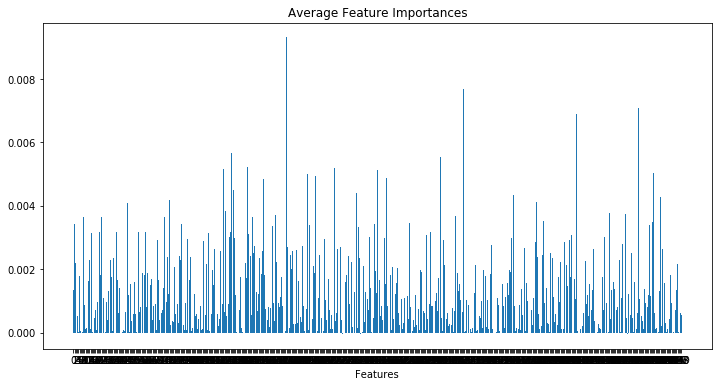

In [18]:
# Range for number of hidden units in the layer
visualize_importances(range(model.input_layer.out_features), np.mean(cond_vals, axis=0))